This notebook is to analyse and visualise all the 5 SIGMOID PARAMETERS DISTRIBUTION and compare them in Singleplex VS Multiplex.<br>
It useful to understand how the parameters are keep or change within assays.

# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import itertools

In [2]:
import python_libraries.data_loading as loadfunc
import python_libraries.plotting_function as plotfunc
import python_libraries.utilities as utils

In [3]:
utils.colourblind()
NMETA = 6

# LOAD DATA

In [4]:
data_path = f'{Path.cwd().parent}/data'
data_selected_path = f'{data_path}/20210716_7_plex'

In [5]:
curve_type_dict = {0: "raw_rb", 
                   1: "norm_curve",
                   2: "fitted_param",
                   3: "fitted_curve",
                   4: "norm_fitted_param",
                   5: "norm_fitted_curve"}

# select the curve types based on the above dictionary information
selected_curve = 2
CURVE_TYPE = curve_type_dict[selected_curve]

In [6]:
singleplex_dict = {0: '20210706_01'}

multiplex_dict = {0: '20210707_01',
                  1: '20210707_03',
                  2: '20210707_02',
                  3: '20210708_01',
                  4: '20210708_02',
                  5: '20210708_03',
                  6: '20210715_01',
                  7: '20210715_02',
                  8: '20210721_02',
                  9: '20210721_03',
                 10: '20210722_01',
                 11: '20210723_01',
                 12: '20210723_02',
                 13: '20210728_02',
                 14: '20210803_03'}

## Getting all the multiplex PMs tested from EXP_ID

In [7]:
id_key = [0]
exp_id_list = []
exp_id_list = utils.list_from_key(singleplex_dict, id_key)
df_to_compute_single = loadfunc.load_processed_data_by_expid(data_selected_path, exp_id_list, CURVE_TYPE)

id_key = [0, 2, 4, 6]
exp_id_list = []
exp_id_list = utils.list_from_key(multiplex_dict, id_key)
df_to_compute_multi = loadfunc.load_processed_data_by_expid(data_selected_path, exp_id_list, CURVE_TYPE)

list(df_to_compute_multi['PrimerMix'].unique())

['PM7.1286',
 'PM7.1430',
 'PM7.2155',
 'PM7.1294',
 'PM7.2151',
 'PM7.2295',
 'PM7.1449',
 'PM7.1593',
 'PM7.2601',
 'PM7.1451',
 'PM7.1595',
 'PM7.2602',
 'PM7.2014',
 'PM7.2303',
 'PM7.4441',
 'PM7.2302',
 'PM7.4382',
 'PM7.4443',
 'PM7.1176',
 'PM7.1318',
 'PM7.1339',
 'PM7.1191',
 'PM7.1319',
 'PM7.2203']

In [8]:
df_to_compute_multi

,Channel,PrimerMix,Target,Assay,Conc,Exp_ID,a,b,c,d,e,MSE
0,panel01,PM7.1286,ADE,ADE_HEX_06,100000.0,20210707_01,0.493082,0.002020,0.142406,-1.290483,100.000000,0.000027
1,panel01,PM7.1286,ADE,ADE_HEX_06,100000.0,20210707_01,0.520957,0.000695,0.127870,-7.105231,100.000000,0.000047
2,panel01,PM7.1286,ADE,ADE_HEX_06,100000.0,20210707_01,0.465507,0.001278,0.132839,-3.965508,100.000000,0.000027
3,panel01,PM7.1286,ADE,ADE_HEX_06,100000.0,20210707_01,0.361441,0.001024,0.208599,21.051233,6.659963,0.000007
4,panel01,PM7.1286,ADE,ADE_HEX_06,100000.0,20210707_01,0.452307,0.002164,0.147335,-1.321285,100.000000,0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...
108811,panel42,PM7.2203,MER,MER_N_03,100000.0,20210715_01,0.527682,0.003051,0.162862,0.514460,100.000000,0.000032
108812,panel42,PM7.2203,MER,MER_N_03,100000.0,20210715_01,0.626359,0.003900,0.152842,-0.466732,100.000000,0.000028
108813,panel42,PM7.2203,MER,MER_N_03,100000.0,20210715_01,0.560321,0.004417,0.177171,3.340205,100.000000,0.000038
108814,panel42,PM7.2203,MER,MER_N_03,100000.0,20210715_01,0.676954,0.002730,0.149759,-1.397294,100.000000,0.000033


In [9]:
print('Here are all the combo that have been analysed in MULTIPLEX format (including: BEST, TOP-ADS, TOP-MDS, MID, BOT)')
print(f"Number of PrimerMixes tested: {len(list(df_to_compute_multi['PrimerMix'].unique()))}")

Here are all the combo that have been analysed in MULTIPLEX format (including: BEST, TOP-ADS, TOP-MDS, MID, BOT)
Number of PrimerMixes tested: 24


## Defining the TOP to BOT combination

In [10]:
combo_dict = {0: 'bottom_six',
              1: 'middle_six',
              2: 'top_six',
              3: 'top_mean',
              4: 'top_min'}

combo_group_id = [0,1,2,3,4]
# combo_group_id = [0,2]

In [11]:
# Combination files where all the PRIMER MIXES IDS are stored (with assays)
df_combination = loadfunc.load_selected_combo(data_selected_path, combo_group_id, combo_dict)
df_combination = df_combination[~df_combination.index.isin(['PM7.2299'])]
df_combination = df_combination.reset_index()

# PLOTTING
## Check the curve plots?

In [12]:
if (selected_curve == 0) or (selected_curve == 1) or (selected_curve == 3):
    plotfunc.curve_plot_by(df_to_compute_multi, NMETA)

## Plotting distribution of the combination (all assays together)

In [13]:
df_combination_plot = df_combination.loc[df_combination['Label'].isin(["PM7.1593","PM7.2151"])]

In [14]:
colormap = [f'C0{i}' for i in range(len(df_to_compute_multi['Target'].unique()))]
TARGET_ALIGN = 'ADE'

confidential_scores = []
combo_idxs = []

for row_index, (combo_idx, combo_series) in enumerate(df_combination.iterrows()):
    combo_idxs.append(combo_series['Label'])
    
    means_c_param_singleplex = []
    means_c_param_multiplex = []
    
    n_targets = len(df_to_compute_single['Target'].unique())  # number of target = 7
    
    
    # SINGLEPLEX ADS
    df_combo_singleplex = df_to_compute_single[df_to_compute_single['Assay'].isin(combo_series.iloc[1:].values)]
    
    reference_position = 0
    
    for (assay, df_), color in zip(df_combo_singleplex.groupby('Assay'), colormap):
        
        mean = df_['c'].mean()
        means_c_param_singleplex.append(mean)  # append the distances values for the ConfMatrix
        
        if TARGET_ALIGN in assay:
            reference_position = mean

            
    # MULTIPLEX ADS
    df_combo_multiplex_temp = df_to_compute_multi[df_to_compute_multi['PrimerMix'] == combo_series.iloc[0]]
    
    c_mean = df_combo_multiplex_temp[df_combo_multiplex_temp['Assay'] == combo_series.iloc[1]]['c'].mean()
    
    shift = c_mean - reference_position
    
    df_combo_multiplex = df_combo_multiplex_temp.copy()
    
    df_combo_multiplex['c'] = df_combo_multiplex_temp['c'] - shift
    
    for (assay, df_m), color in zip(df_combo_multiplex.groupby('Assay'), colormap):
        
        mean = df_m['c'].mean()
        means_c_param_multiplex.append(mean)  # append the distances values for the ConfMatrix
    
    
    ################################### Matrix calculation ############################

    mask_ut = np.tril(np.ones(n_targets)).astype(np.bool)  # mask to show triangular matrix
        
    # SINGLEPLEX MATRIX
    matrix_single = [abs(c[1] - c[0]) for c in itertools.combinations(means_c_param_singleplex, 2)]
    
    # MULTIPLEX MATRIX
    matrix_multi = [abs(c[1] - c[0]) for c in itertools.combinations(means_c_param_multiplex, 2)]
    
    # DIFFERENCE MATRIX
    error_vector = np.absolute(np.array(matrix_single) - np.array(matrix_multi))
    
    root_sqrd_error = np.sqrt((np.dot(error_vector, error_vector))/len(error_vector))
    confidential_scores.append(root_sqrd_error)

################################################################################################    

RMSE_dict = {}
for combo_idx, RMSE in zip(combo_idxs, confidential_scores):
    RMSE_dict[combo_idx] = round(RMSE, 3)
    
for key in sorted(RMSE_dict.keys()):
    print(f"{key} : {RMSE_dict[key]}")

PM7.1176 : 0.011
PM7.1191 : 0.009
PM7.1286 : 0.026
PM7.1294 : 0.019
PM7.1318 : 0.029
PM7.1319 : 0.031
PM7.1339 : 0.018
PM7.1430 : 0.026
PM7.1449 : 0.012
PM7.1451 : 0.014
PM7.1593 : 0.012
PM7.1595 : 0.01
PM7.2014 : 0.035
PM7.2151 : 0.031
PM7.2155 : 0.023
PM7.2203 : 0.033
PM7.2295 : 0.036
PM7.2302 : 0.024
PM7.2303 : 0.041
PM7.2601 : 0.006
PM7.2602 : 0.01
PM7.4382 : 0.033
PM7.4441 : 0.026
PM7.4443 : 0.031


In [15]:
df_combination_plot2 = df_combination_plot.replace(regex="ADE", value="HAdV")
df_combination_plot2 = df_combination_plot2.replace(regex="C22", value="HCoV-229E")
df_combination_plot2 = df_combination_plot2.replace(regex="CHK", value="HCoV-HKU1")
df_combination_plot2 = df_combination_plot2.replace(regex="CNL", value="HCoV-NL63")
df_combination_plot2 = df_combination_plot2.replace(regex="COC", value="HCoV-OC43")
df_combination_plot2 = df_combination_plot2.replace(regex="COV", value="SARS-CoV-2")
df_combination_plot2 = df_combination_plot2.replace(regex="MER", value="MERS")
df_combination_plot2.iloc[0,1:].values

array(['HAdV_HEX_06', 'HCoV-229E_N_01', 'HCoV-HKU1_N_08',
       'HCoV-NL63_N_01', 'HCoV-OC43_N_01', 'SARS-CoV-2_N_03', 'MERS_N_01'],
      dtype=object)

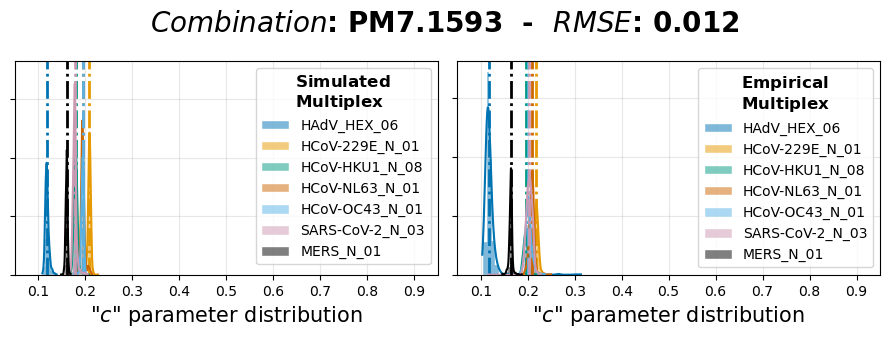

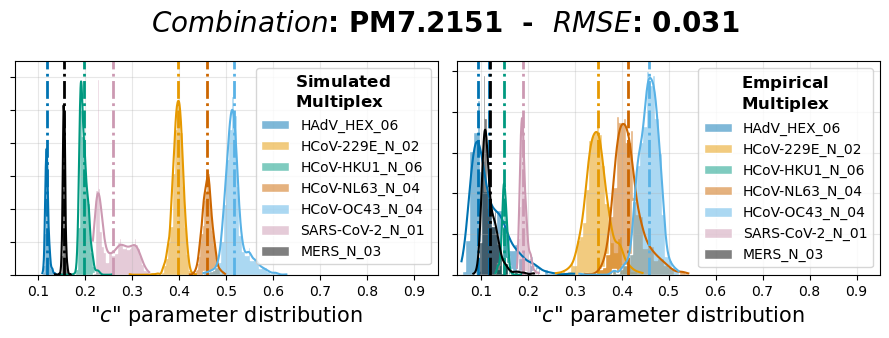

In [21]:
# Align on the starting target
colormap = [f'C0{i}' for i in range(len(df_to_compute_multi['Target'].unique()))]
TARGET_ALIGN = 'ADE'

# Plotting
for row_index, (combo_idx, combo_series) in enumerate(df_combination_plot.iterrows()):

    labels = df_combination_plot2.loc[df_combination_plot2.index==combo_idx].iloc[:,1:].values[0]
    
    distance_single = []
    distance_multi = []
    
    fig, ax = plt.subplots(1, 2, figsize=(9, 3.4), dpi=100)
    
    pm_id = combo_series['Label']
    fig.suptitle(f'$\itCombination$: {pm_id}  -  $\itRMSE$: {RMSE_dict[pm_id]}', size=20, fontweight='bold')
    
    df_combo_singleplex = df_to_compute_single[df_to_compute_single['Assay'].isin(combo_series.iloc[1:].values)]
    
    reference_position = 0
    
    for (assay, df_), color in zip(df_combo_singleplex.groupby('Assay'), colormap):
#         ax[0].set_title('Simulated Multiplex\n"c" parameters distribution', size=18)
        
        sns.histplot(data=df_, x="c", ax=ax[0], color=color, element='step',
                     kde=True, bins=30, edgecolor='w', linewidth=1, label=assay)
        
        mean = df_['c'].mean()
        distance_single.append(mean)
        ax[0].axvline(mean, c=color, ls='-.', lw=2)
        
        if TARGET_ALIGN in assay:
            reference_position = mean

    ax[0].set_xlabel('')
    ax[0].set_ylabel('')
    ax[0].set_yticklabels([])
    ax[0].grid(alpha=0.3)
    ax[0].set_xlim([.05, .95])
    ax[0].set_xlabel('"$\it{c}$" parameter distribution', size=15)
    
    handles, _ = ax[0].get_legend_handles_labels()
    handles = handles[::1]
    ax[0].legend(handles, labels, title=r"$\bf{Simulated}$" +'\n'+ r"$\bf{Multiplex}$", title_fontsize=12,  loc='upper right')
    
    df_combo_multiplex_temp = df_to_compute_multi[df_to_compute_multi['PrimerMix']==combo_series.iloc[0]]
    
    c_mean = df_combo_multiplex_temp[df_combo_multiplex_temp['Assay']==combo_series.iloc[1]]['c'].mean()
    
    shift = c_mean - reference_position
    
    df_combo_multiplex = df_combo_multiplex_temp.copy()
    
    df_combo_multiplex['c'] = df_combo_multiplex_temp['c'] - shift
    
    for (assay, df_), color in zip(df_combo_multiplex.groupby('Assay'), colormap):
#         ax[1].set_title('Empirical Multiplex\n"c" parameters distribution', size=18)
        
        mean = df_['c'].mean()
        
        if combo_idx==15 and 'ADE' in assay:
            ax[1].axvline(0.095, c='C00', ls='-.', lw=2)
        
        ax[1].axvline(mean, c=color, ls='-.', lw=2)
        
        distance_multi.append(mean)
        
        sns.histplot(data=df_, x="c", ax=ax[1], color=color, element='step',
                                         kde=True, bins=30, edgecolor='w', linewidth=1, label=assay)
        
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')
    ax[1].set_yticklabels([])
    ax[1].grid(alpha=0.3)
    ax[1].set_xlim([.05, .95])
    ax[1].set_xlabel('"$\it{c}$" parameter distribution', size=15)
    
    handles, _ = ax[1].get_legend_handles_labels()
    handles = handles[::1]
    ax[1].legend(handles, labels, title=r"$\bf{Empirical}$" +'\n'+ r"$\bf{Multiplex}$", title_fontsize=12, loc='upper right')
    
    plt.tight_layout()
    plt.show()
    directory = Path.cwd().parents[1] / "02_figures" / "Fig5"
    fig.savefig(directory / f'distplot_{pm_id}.pdf')
    plt.close()